In [1]:
import os

import matplotlib.pyplot as plt # visualization
import numpy as np # linear algebra
import pandas as pd # data processing

# Домашнаяя работа: работа с numpy, pandas и matplotlib

В этой домашней работе вам предстоит выполнить EDA (Exploratory Data Analysis) датасета с данными о футболистах FIFA.

Требования к выполнению домашней работы:
- Во всех графиках должны быть подписи через `title`, `legend`, etc.
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново. Если не видно - напишите в общий чатик, вам помогут либо преподаватели, либо те, кто уже столкнулся с этой проблемой
- Можно баловаться с цветами, но в меру. Если в итоге работа станет нечитаемой, то задание не будет засчитано
- Если вы сдаете работу в Google Colaboratory, убедитесь, что ваша тетрадка доступна по ссылке. Если в итоге по каким-то причинам тетрадка не будет открываться у преподавателя, задание не будет засчитано

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [4]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [5]:
df[['Wage']].head(10)

,Wage
0,€565K
1,€405K
2,€290K
3,€260K
4,€355K
5,€340K
6,€420K
7,€455K
8,€380K
9,€94K


# Работа с датафреймом

Заполните пропуски:

1. В датасете `88` переменных 
2. Из них числовых `43`

# Работа с графикой

3. Изучите распределение возрастов с помощью колонки Age [px.histogram](https://plotly.com/python/histograms/)
4. Изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений 

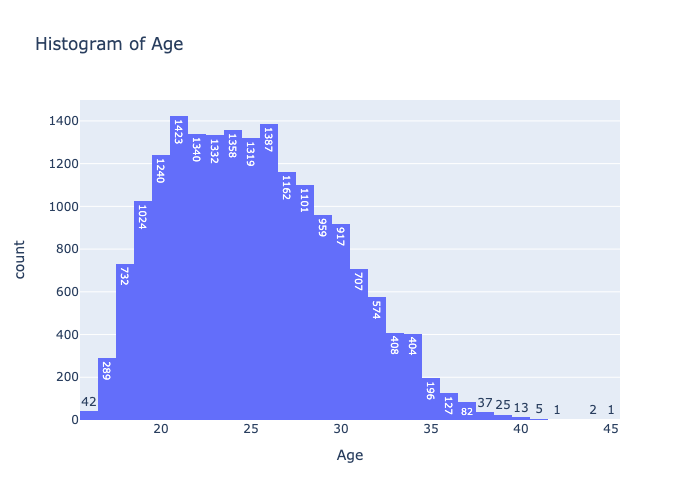

In [6]:
# Ваш код красивый и самый лучший сюда 
from IPython.display import Image

import plotly.express as px
fig = px.histogram(df, 
                   x="Age",
                   title='Histogram of Age',
                   text_auto=True,
                  )
                   
# fig.show()
img_bytes = fig.to_image(format='png')
Image(img_bytes)

Графики Plotly сами по себе интерактивные, то есть можно не просто анализировать график, смотря на него, но и также можно взаимодействовать с ним. Наводя на конкретные значения, можно получить более подробную информацию именно об этой части графика. А также в какой-то степени настраивать легенду и другие элементы графиков с помощью Plotly проще.

5. Найдите колонку, показывающую, является ли футболист левой или правшой
6. Визуализируйте соотношенеие между левшами и правшами (считаем, что признак "левша"/"правша" определяет предпочтительную ногу для ударов

Колонка 'Preferred Foot' показывает предпочтительную ногу для ударов

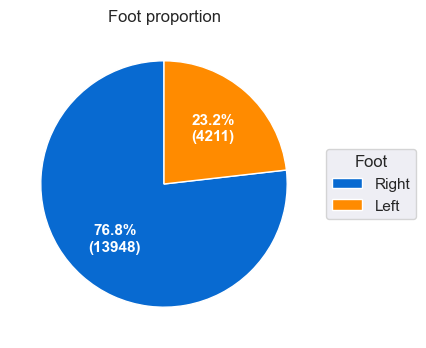

In [7]:
# Ваш гениальный код сюда
# Ваш код красивый и самый лучший сюда 
import seaborn as sns

sns.set_theme()

preferred_foot_df = df['Preferred Foot'].value_counts().to_frame().reset_index()
preferred_foot_df.columns = ['Foot', 'Count']

fig, ax = plt.subplots(figsize=(7, 4), subplot_kw=dict(aspect="equal"))

data = [x for x in preferred_foot_df['Count']]
foot = [x for x in preferred_foot_df['Foot']]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

colors = ['#086AD1','#ff8b00']

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  startangle=90,
                                  colors=colors)

ax.legend(wedges, foot,
          title="Foot",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=11, weight="bold")

ax.set_title("Foot proportion")


plt.show()

Правшей намного больше, чем игроков с ведущей левой ногой.

7. Визуализируйте Международный Рейтинг футболистов (International Reputation)
8. Ассоциирован ли он с национальностью? С футбольным клубом? 

![Игроки](Players.png "Title")

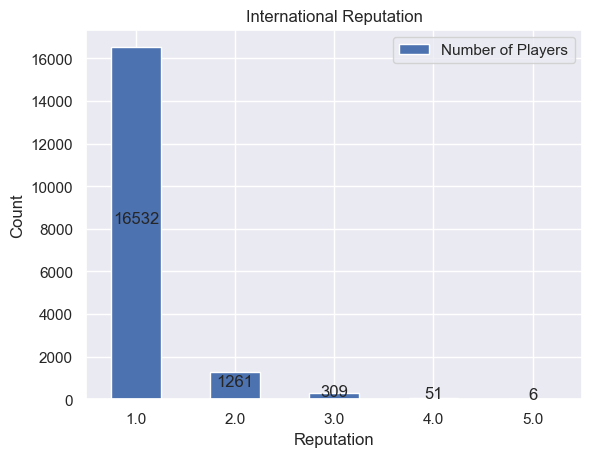

In [8]:
# ну сами понимаете...

fig, ax = plt.subplots()
int_rep_df = df['International Reputation'].value_counts()
int_rep_df.plot(kind='bar', ax=ax, xlabel='Reputation', ylabel='Count', rot=0)

ax.legend(["Number of Players"]);
ax.set_title('International Reputation')

for x, y, p in zip(int_rep_df.index-1, int_rep_df, int_rep_df):
    plt.text(x, y//2, p, ha = 'center')
    
plt.show()

Тут можно заметить, что большая часть игроков имеет Международный Рейтинг равный единице, и лишь некоторые имеет более высокий рейтинг.

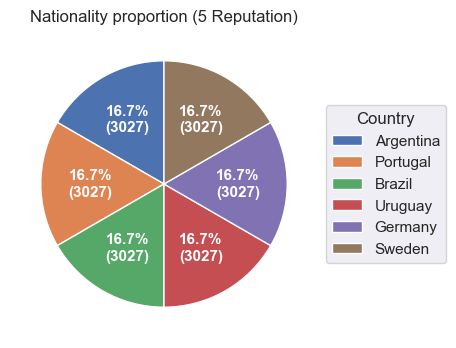

In [9]:
int_rep_nat_df = df[['International Reputation', 'Nationality']]
int_rep_nat_5_df = int_rep_nat_df.loc[(int_rep_nat_df['International Reputation'] == 5)]
nationalities_5_df = int_rep_nat_5_df['Nationality'].value_counts().to_frame().reset_index()
nationalities_5_df.columns = ['Nationality', 'Count']

fig, ax = plt.subplots(figsize=(7, 4), subplot_kw=dict(aspect="equal"))

data_nat_5 = [x for x in nationalities_5_df['Count']]
nationalities_5 = [x for x in nationalities_5_df['Nationality']]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


wedges, texts, autotexts = ax.pie(data_nat_5, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  startangle=90)

ax.legend(wedges, nationalities_5,
          title="Country",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=11, weight="bold")

ax.set_title("Nationality proportion (5 Reputation)")

plt.show()

Смотря только на игроков с рейтингом 5, можно предположить, что национальность не влияет на рейтинг. Однако таких игроков всего лишь 6.

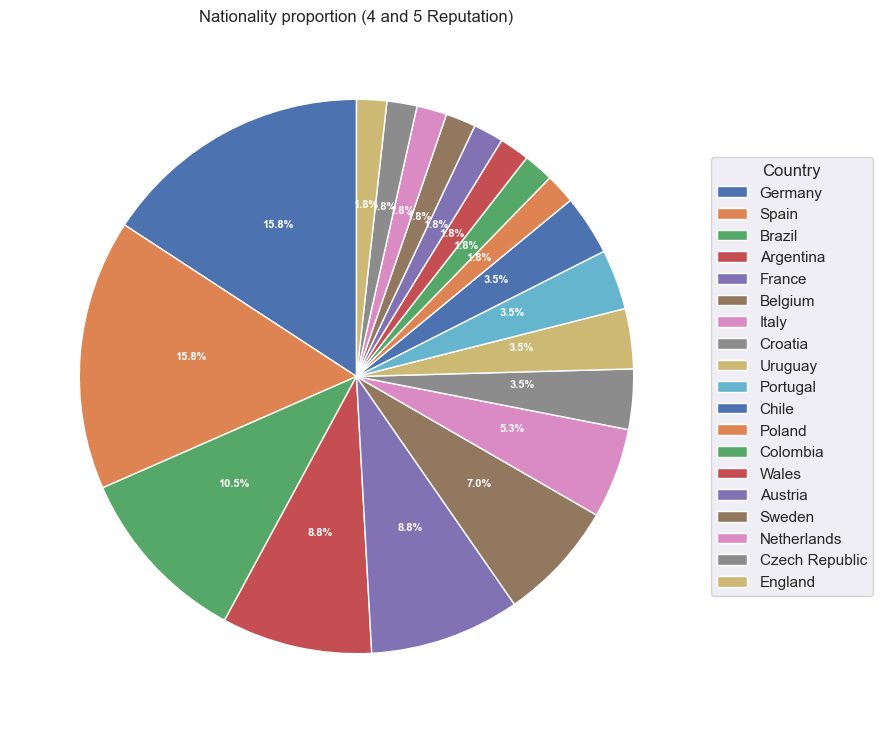

In [10]:
int_rep_nat_4_5_df = int_rep_nat_df.loc[(int_rep_nat_df['International Reputation'] == 5) | (int_rep_nat_df['International Reputation'] == 4)]
nationalities_4_5_df = int_rep_nat_4_5_df['Nationality'].value_counts().to_frame().reset_index()
nationalities_4_5_df.columns = ['Nationality', 'Count']

fig, ax = plt.subplots(figsize=(16, 9), subplot_kw=dict(aspect="equal"))

data_nat_4_5 = [x for x in nationalities_4_5_df['Count']]
nationalities_4_5 = [x for x in nationalities_4_5_df['Nationality']]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n"


wedges, texts, autotexts = ax.pie(data_nat_4_5, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  startangle=90)

ax.legend(wedges, nationalities_4_5,
          title="Country",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nationality proportion (4 and 5 Reputation)")

plt.show()

А вот если взять игроков с рейтингом 4 и 5, то уже становится заметно, что игроки из Германии, Испании и Бразилии чаще имеют высокий Международный рейтинг, чем другие.

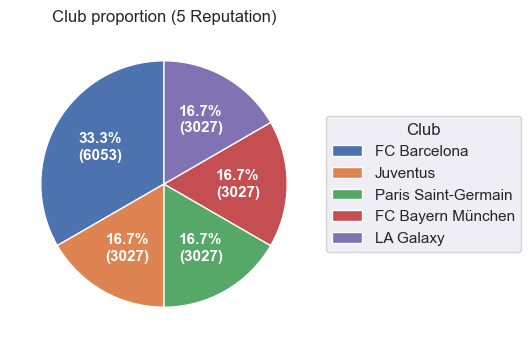

In [11]:
int_rep_club_df = df[['International Reputation', 'Club']]
int_rep_club_5_df = int_rep_club_df.loc[(int_rep_club_df['International Reputation'] == 5)]
club_5_df = int_rep_club_5_df['Club'].value_counts().to_frame().reset_index()
club_5_df.columns = ['Club', 'Count']

fig, ax = plt.subplots(figsize=(7, 4), subplot_kw=dict(aspect="equal"))

data_club_5 = [x for x in club_5_df['Count']]
club_5 = [x for x in club_5_df['Club']]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


wedges, texts, autotexts = ax.pie(data_club_5, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  startangle=90)

ax.legend(wedges, club_5,
          title="Club",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=11, weight="bold")

ax.set_title("Club proportion (5 Reputation)")

plt.show()

Если смотреть только на Международный рейтинг 5, то в Барселоне больше всего таких игроков.

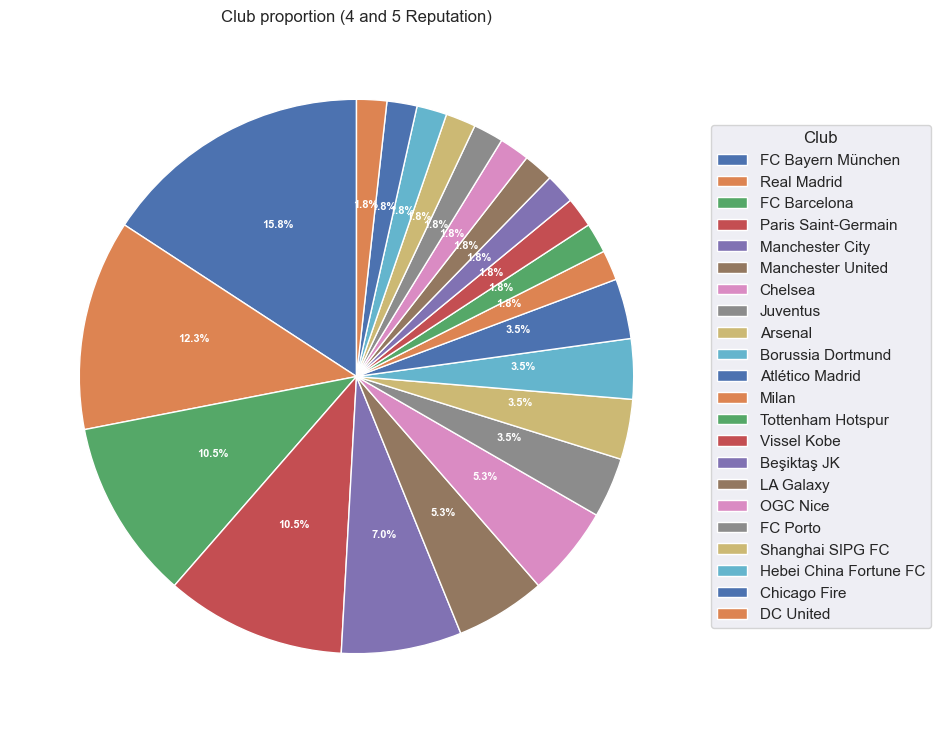

In [12]:
int_rep_club_4_5_df = int_rep_club_df.loc[(int_rep_club_df['International Reputation'] == 5) | (int_rep_club_df['International Reputation'] == 4)]
club_4_5_df = int_rep_club_4_5_df['Club'].value_counts().to_frame().reset_index()
club_4_5_df.columns = ['Club', 'Count']

fig, ax = plt.subplots(figsize=(16, 9), subplot_kw=dict(aspect="equal"))

data_club_4_5 = [x for x in club_4_5_df['Count']]
club_4_5 = [x for x in club_4_5_df['Club']]

def func(pct, allvals):
    return f"{pct:.1f}%\n"


wedges, texts, autotexts = ax.pie(data_club_4_5, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  startangle=90)

ax.legend(wedges, club_4_5,
          title="Club",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Club proportion (4 and 5 Reputation)")

plt.show()

Однако если смотреть на рейтинг 4 и 5, то тут уже в числе первый будет Бавария, Реал Мадрид, Барселона и ПСЖ.

9. Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её
10. Влияет ли на потенциал игровая нога? Почему так может случиться? (картинка в тему)

![Коазуация или корреляция?](causuation.png "???")

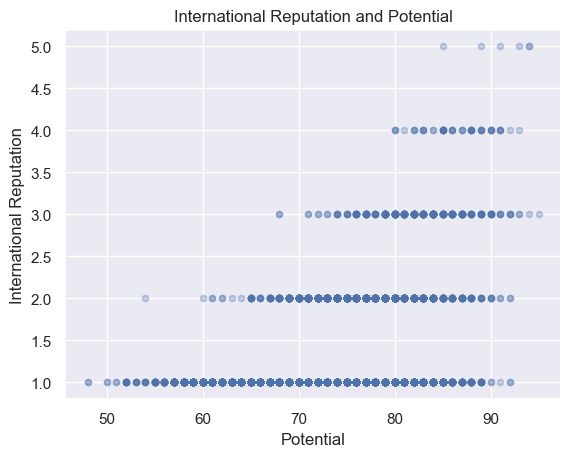

In [13]:
# 🤔 угадайте что
fig, ax = plt.subplots()
pot_int_rep_df = df[['Potential', 'International Reputation']]
pot_int_rep_df.plot(kind='scatter', x='Potential', y='International Reputation', color=['b'], ax=ax, alpha=0.3)
ax.set_title('International Reputation and Potential')
plt.show()

In [14]:
pot_int_rep_df.corr(method='pearson')

,Potential,International Reputation
Potential,1.000000,0.372993
International Reputation,0.372993,1.000000


Тут видно, что между Потенциалом и Международный рейтингом существует зависимость такая, что при увеличении потенциала рейтинг тоже увеличивается, однако так происходит не всегда, что видно по значению корреляции.

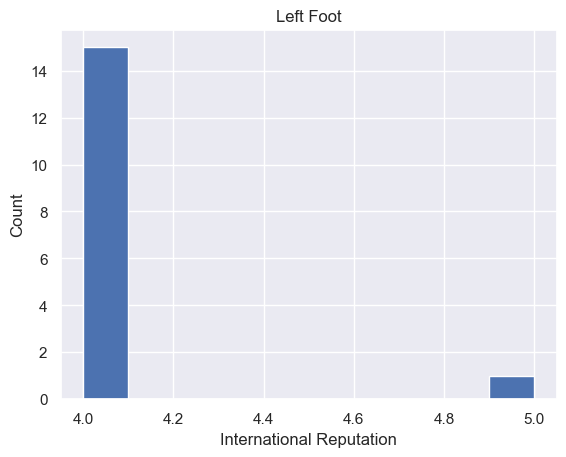

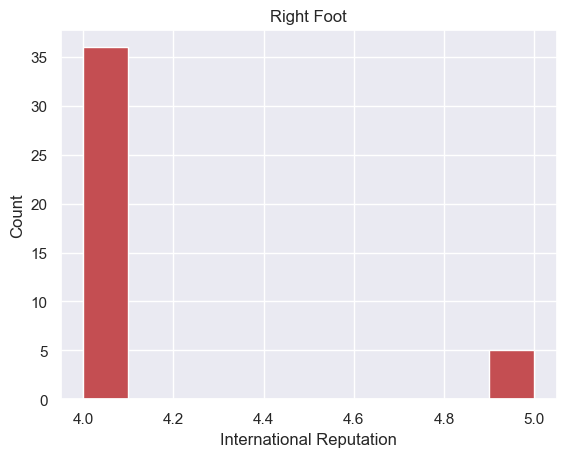

In [15]:
int_rep_foot_df = df[['International Reputation', 'Preferred Foot']]

fig, ax = plt.subplots()
pot_left_foot_df = int_rep_foot_df.loc[(int_rep_foot_df['Preferred Foot'] == 'Left') & ((int_rep_foot_df['International Reputation'] == 5) | (int_rep_foot_df['International Reputation'] == 4))]
pot_left_foot_df.hist(ax=ax);
ax.set_title('Left Foot')
ax.set_ylabel('Count')
ax.set_xlabel('International Reputation')
plt.show()

pot_right_foot_df = int_rep_foot_df.loc[(int_rep_foot_df['Preferred Foot'] == 'Right') & ((int_rep_foot_df['International Reputation'] == 5) | (int_rep_foot_df['International Reputation'] == 4))]
fig, ax = plt.subplots()
pot_right_foot_df.hist(color='r', label='Right', ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('International Reputation')
ax.set_title('Right Foot')
plt.show()

Исходя из данных, представленных на графике, можно предположить, что количество левшей меньше количества правшей при Международном рейтинге 4 или 5. Однако не стоит забывать, что изначально количество левшей намного меньше, чем правшей. Поэтому такое соотношение их количества на графике является очевидным.

Теперь пройдёмся по показателям игроков...

11. Есть ли зависимость между **выносливостью** игрока (Stamina) и его **силой** (Strength)? Какая? Точно ли это зависимость? 


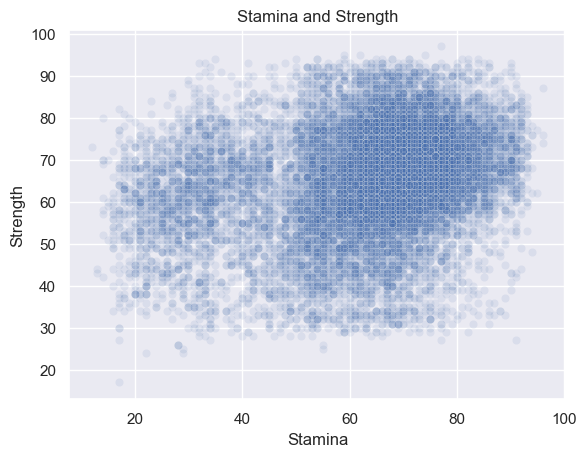

In [16]:
# ...
fig, ax = plt.subplots()
stam_str_df = df[['Stamina', 'Strength']]
ax.set_title('Stamina and Strength')


sns.scatterplot(data=df, x="Stamina", y="Strength", legend=True, alpha=0.1)

plt.show()

Можно предположить: чем больше выносливость игрока, тем больше его сила. Однако нельзя утверждать так с полной уверенностью. Огромное количество значений заключено между 50 и 80 выносливостью и 50 и 90 силой. 

In [17]:
stam_str_df.corr(method='pearson')

,Stamina,Strength
Stamina,1.000000,0.262694
Strength,0.262694,1.000000


Зависимость довольно-таки слабая. Поэтому нельзя точно утверждать, что между выносливостью и силой имеется линейная зависимость.

12. Зависит ли **стоимость** игрока (Value) от его "**финтов**" (Skill Moves)?

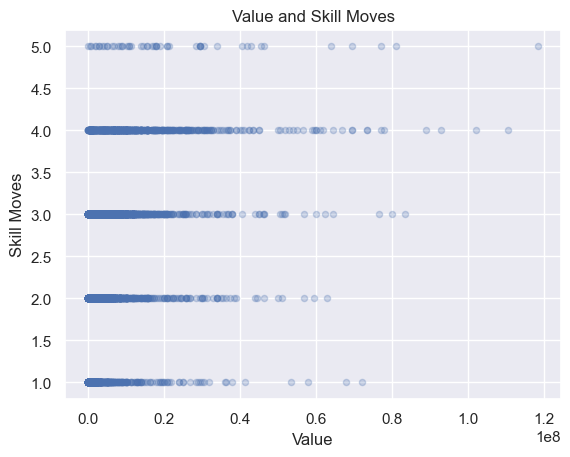

In [18]:
# ...

def value_to_float(value):
    if value[-1] == 'M':
        value = float(value[1:-1])*1000000
    elif value[-1] == 'K':
        value = float(value[1:-1])*1000
    else:
        value = float(value[1:])
    return value

value_skill_df = pd.DataFrame({'Value': df['Value'].apply(value_to_float), 'Skill Moves': df['Skill Moves']})
fig, ax = plt.subplots()
value_skill_df.plot(kind='scatter', x='Value', y='Skill Moves', rot=0, color=['b'], ax=ax, alpha=0.25)
ax.set_title('Value and Skill Moves')
ax.set_ylabel('Skill Moves')
ax.set_xlabel('Value')
plt.show()

Стоимость игрока не засисит от уровня его финтов.

In [19]:
value_skill_df.corr(method='pearson')

,Value,Skill Moves
Value,1.000000,0.315651
Skill Moves,0.315651,1.000000


Возможно и существует зависимость, однако она слабая.

13. Покажите распределения основных характеристик игроков: **рост**, **вес**, **возраст** по **позициям** (Position), сделайте выводы

/var/folders/kn/m300txrd01d9f5_759c429l00000gn/T/ipykernel_79189/2030117674.py:9: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



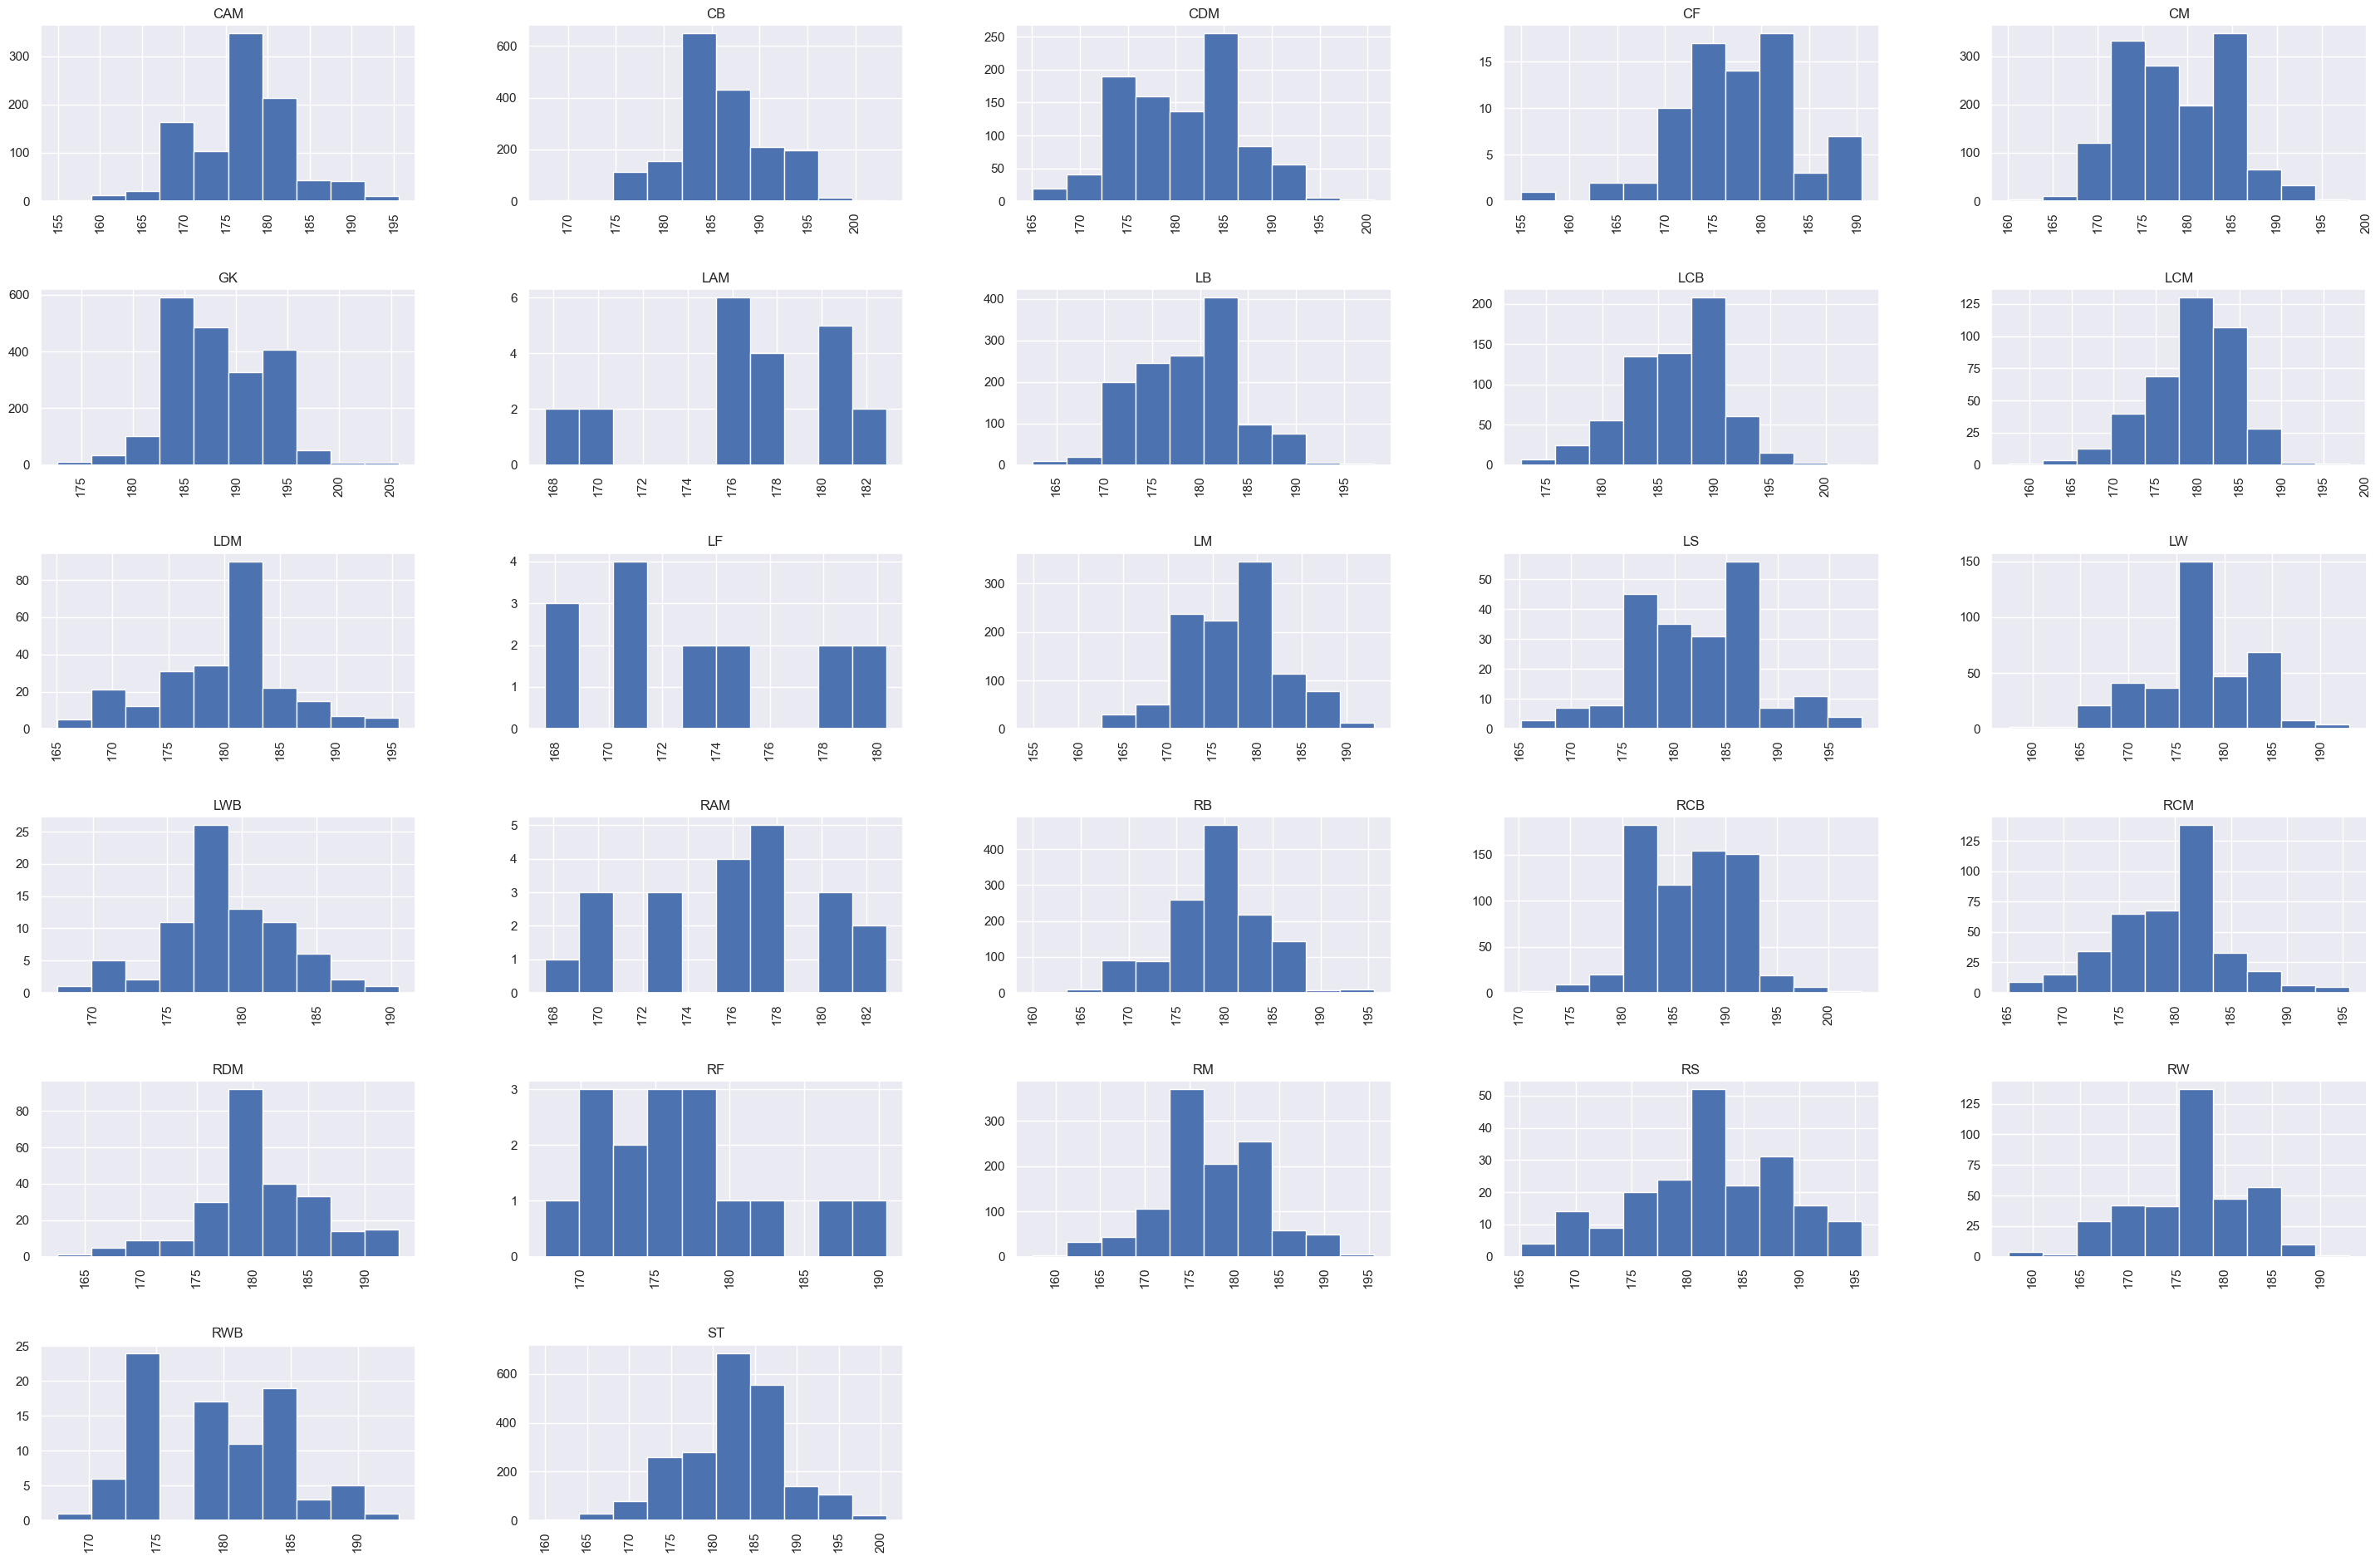

In [20]:
def parse_ht(ht):
    ht_ = str(ht).split("'")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (30.48*ft_) + 2.54*in_

height_pos_df = pd.DataFrame({ 'Height': df['Height'].dropna().apply(lambda x:parse_ht(x)), 'Position': df['Position'] })
fig, ax = plt.subplots(figsize = (35,24))
height_pos_df.hist(column='Height', by='Position', ax=ax);
plt.show()

Можно утверждать, что у голкиперов рост один из самых высоких. Также у центральных защитников тоже высокий рост, а вот у крайних защитников не такой уж высокий. У центральных опорных защитников рост также больше, чем у крайних. У игроков центра поля (полузащитников) в центре рост также выше, чем у крайних. Тут есть еще одна особенность: рост левых полузащитников выше, чем правых. Игроки, играющие под нападающими, в центре также выше, чем крайние. Нападающие выше тех, кто играет под ними.

/var/folders/kn/m300txrd01d9f5_759c429l00000gn/T/ipykernel_79189/1360406448.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



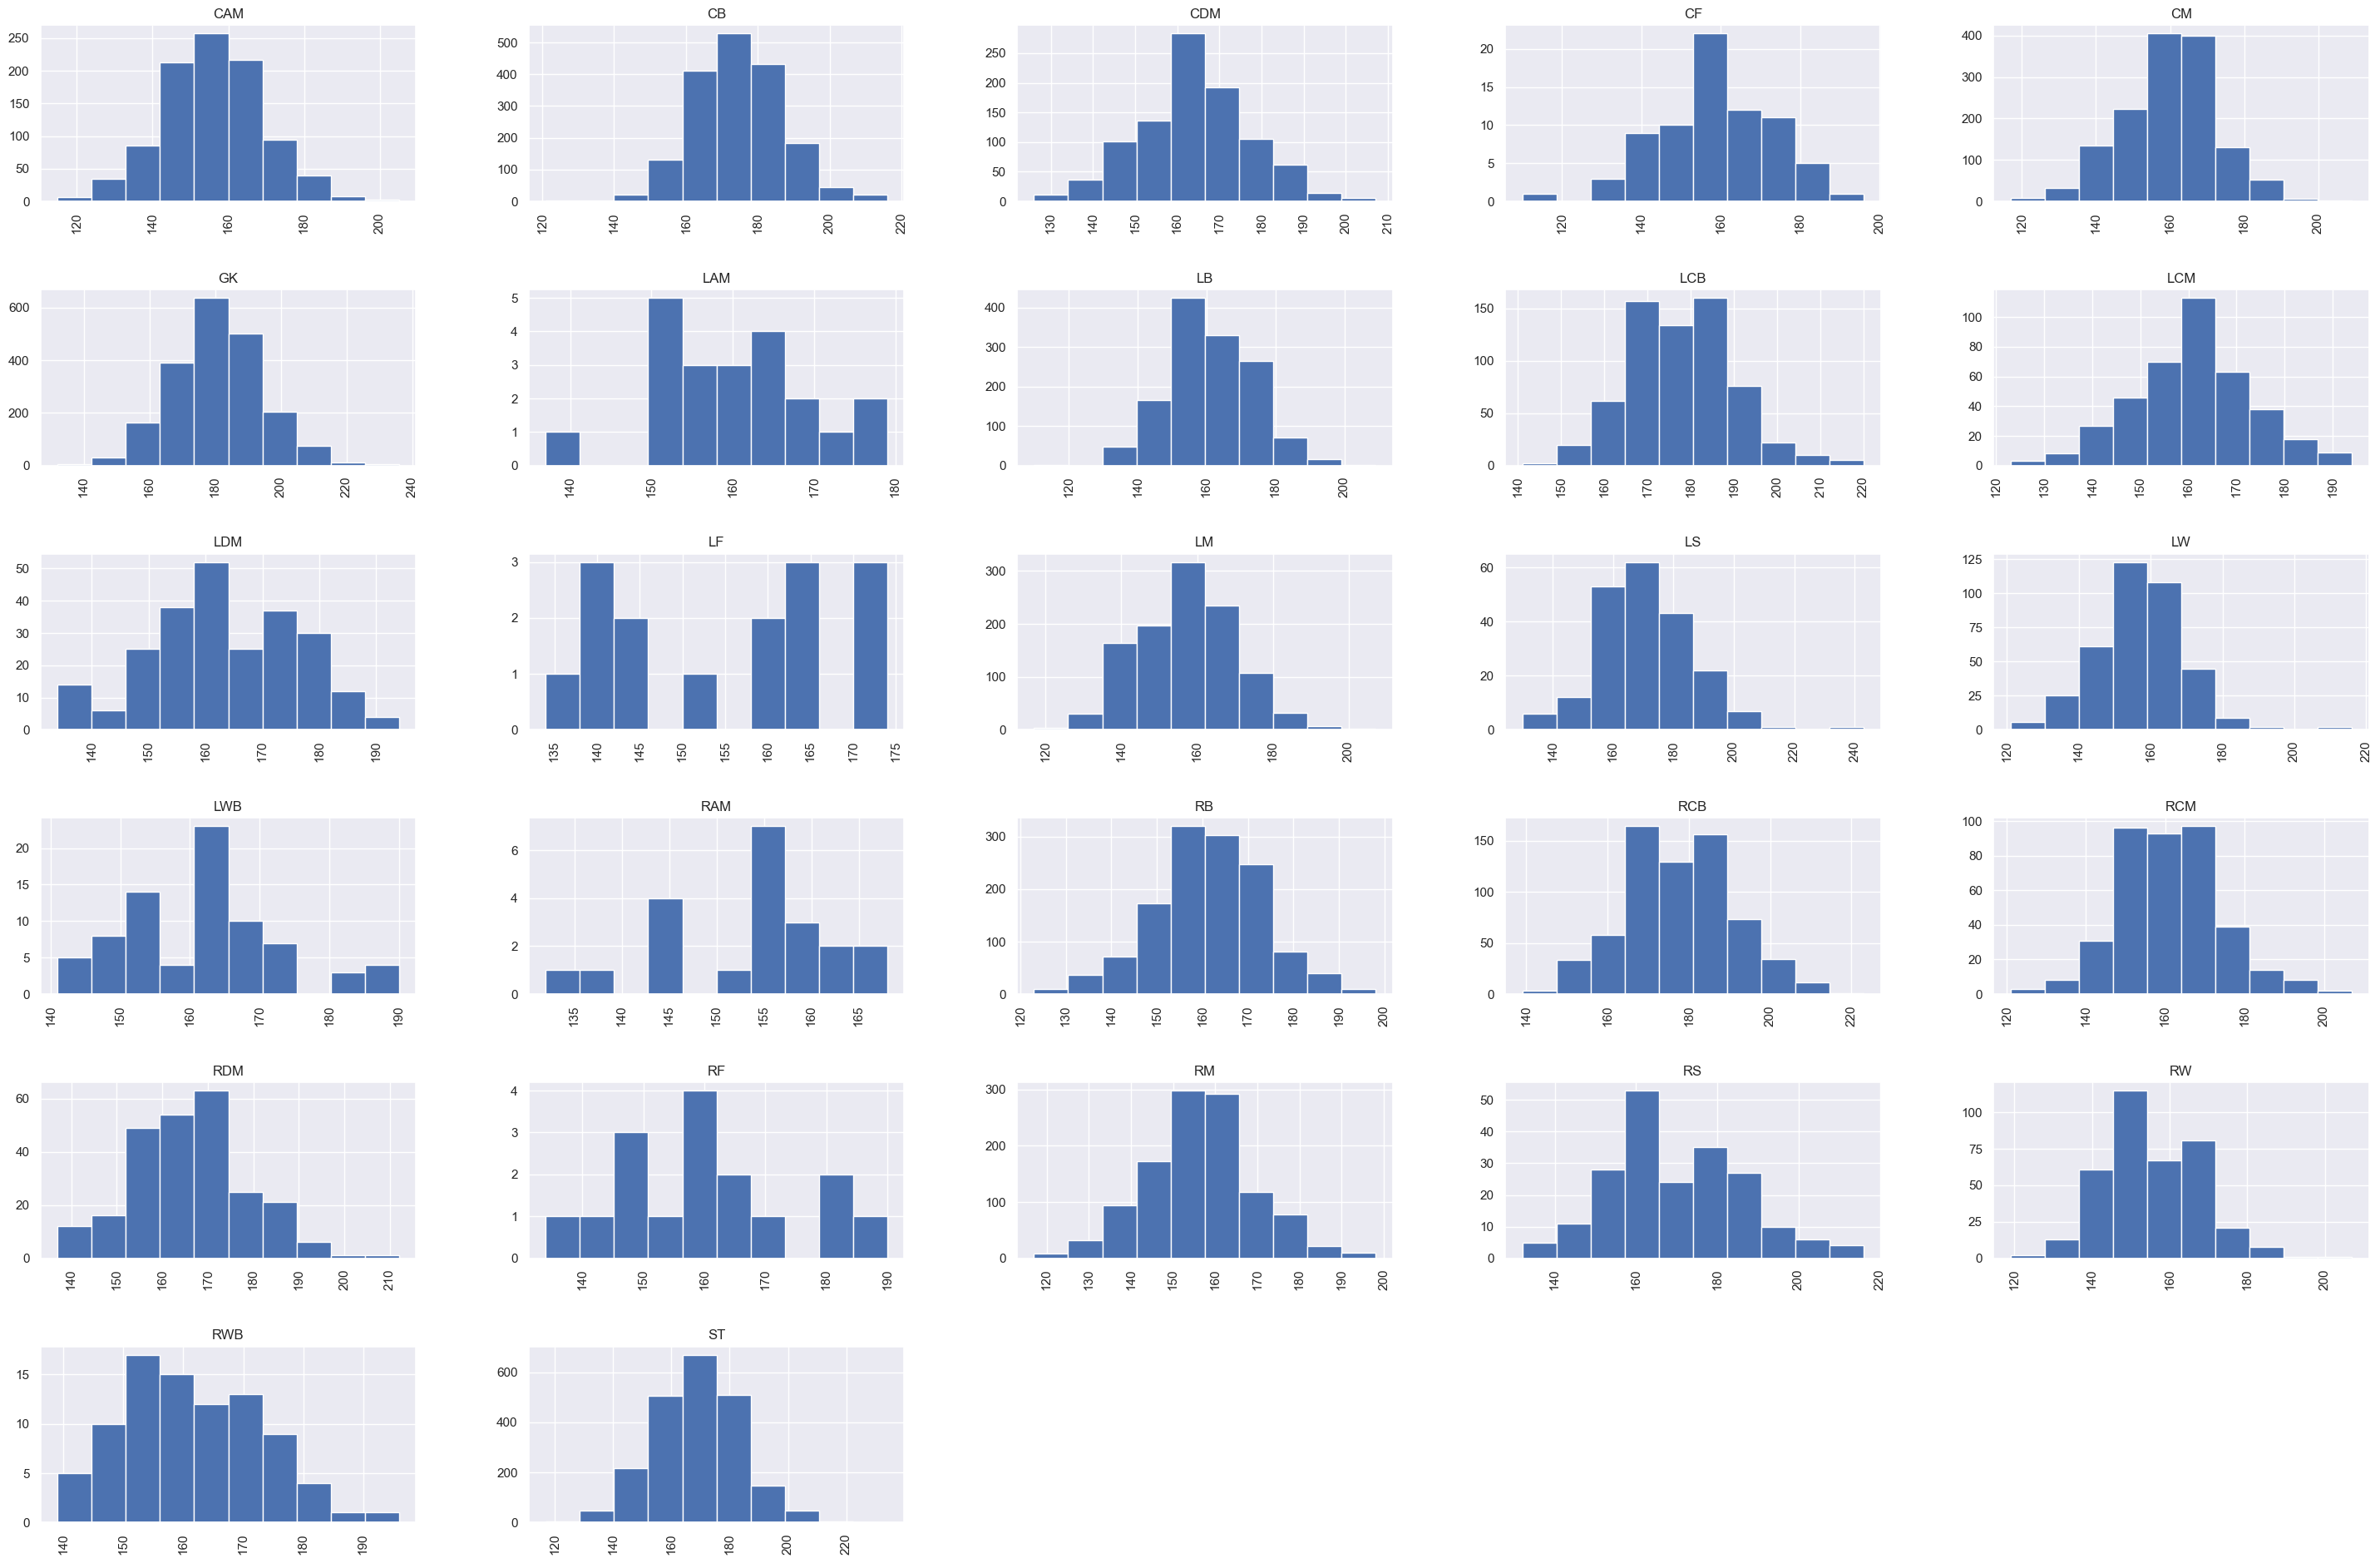

In [21]:
weight_pos_df = pd.DataFrame({ 'Weight': df['Weight'].dropna().apply(lambda x: int(str(x)[:-3])), 'Position': df['Position'] })
fig, ax = plt.subplots(figsize = (35,24))
weight_pos_df.hist(column='Weight', by='Position', ax=ax)
plt.show()

Игроки центра поля и голкиперы зачастую весят больше, чем крайние игроки. А самые большие веса у центральных защитников и нападающих.

/var/folders/kn/m300txrd01d9f5_759c429l00000gn/T/ipykernel_79189/3051941030.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



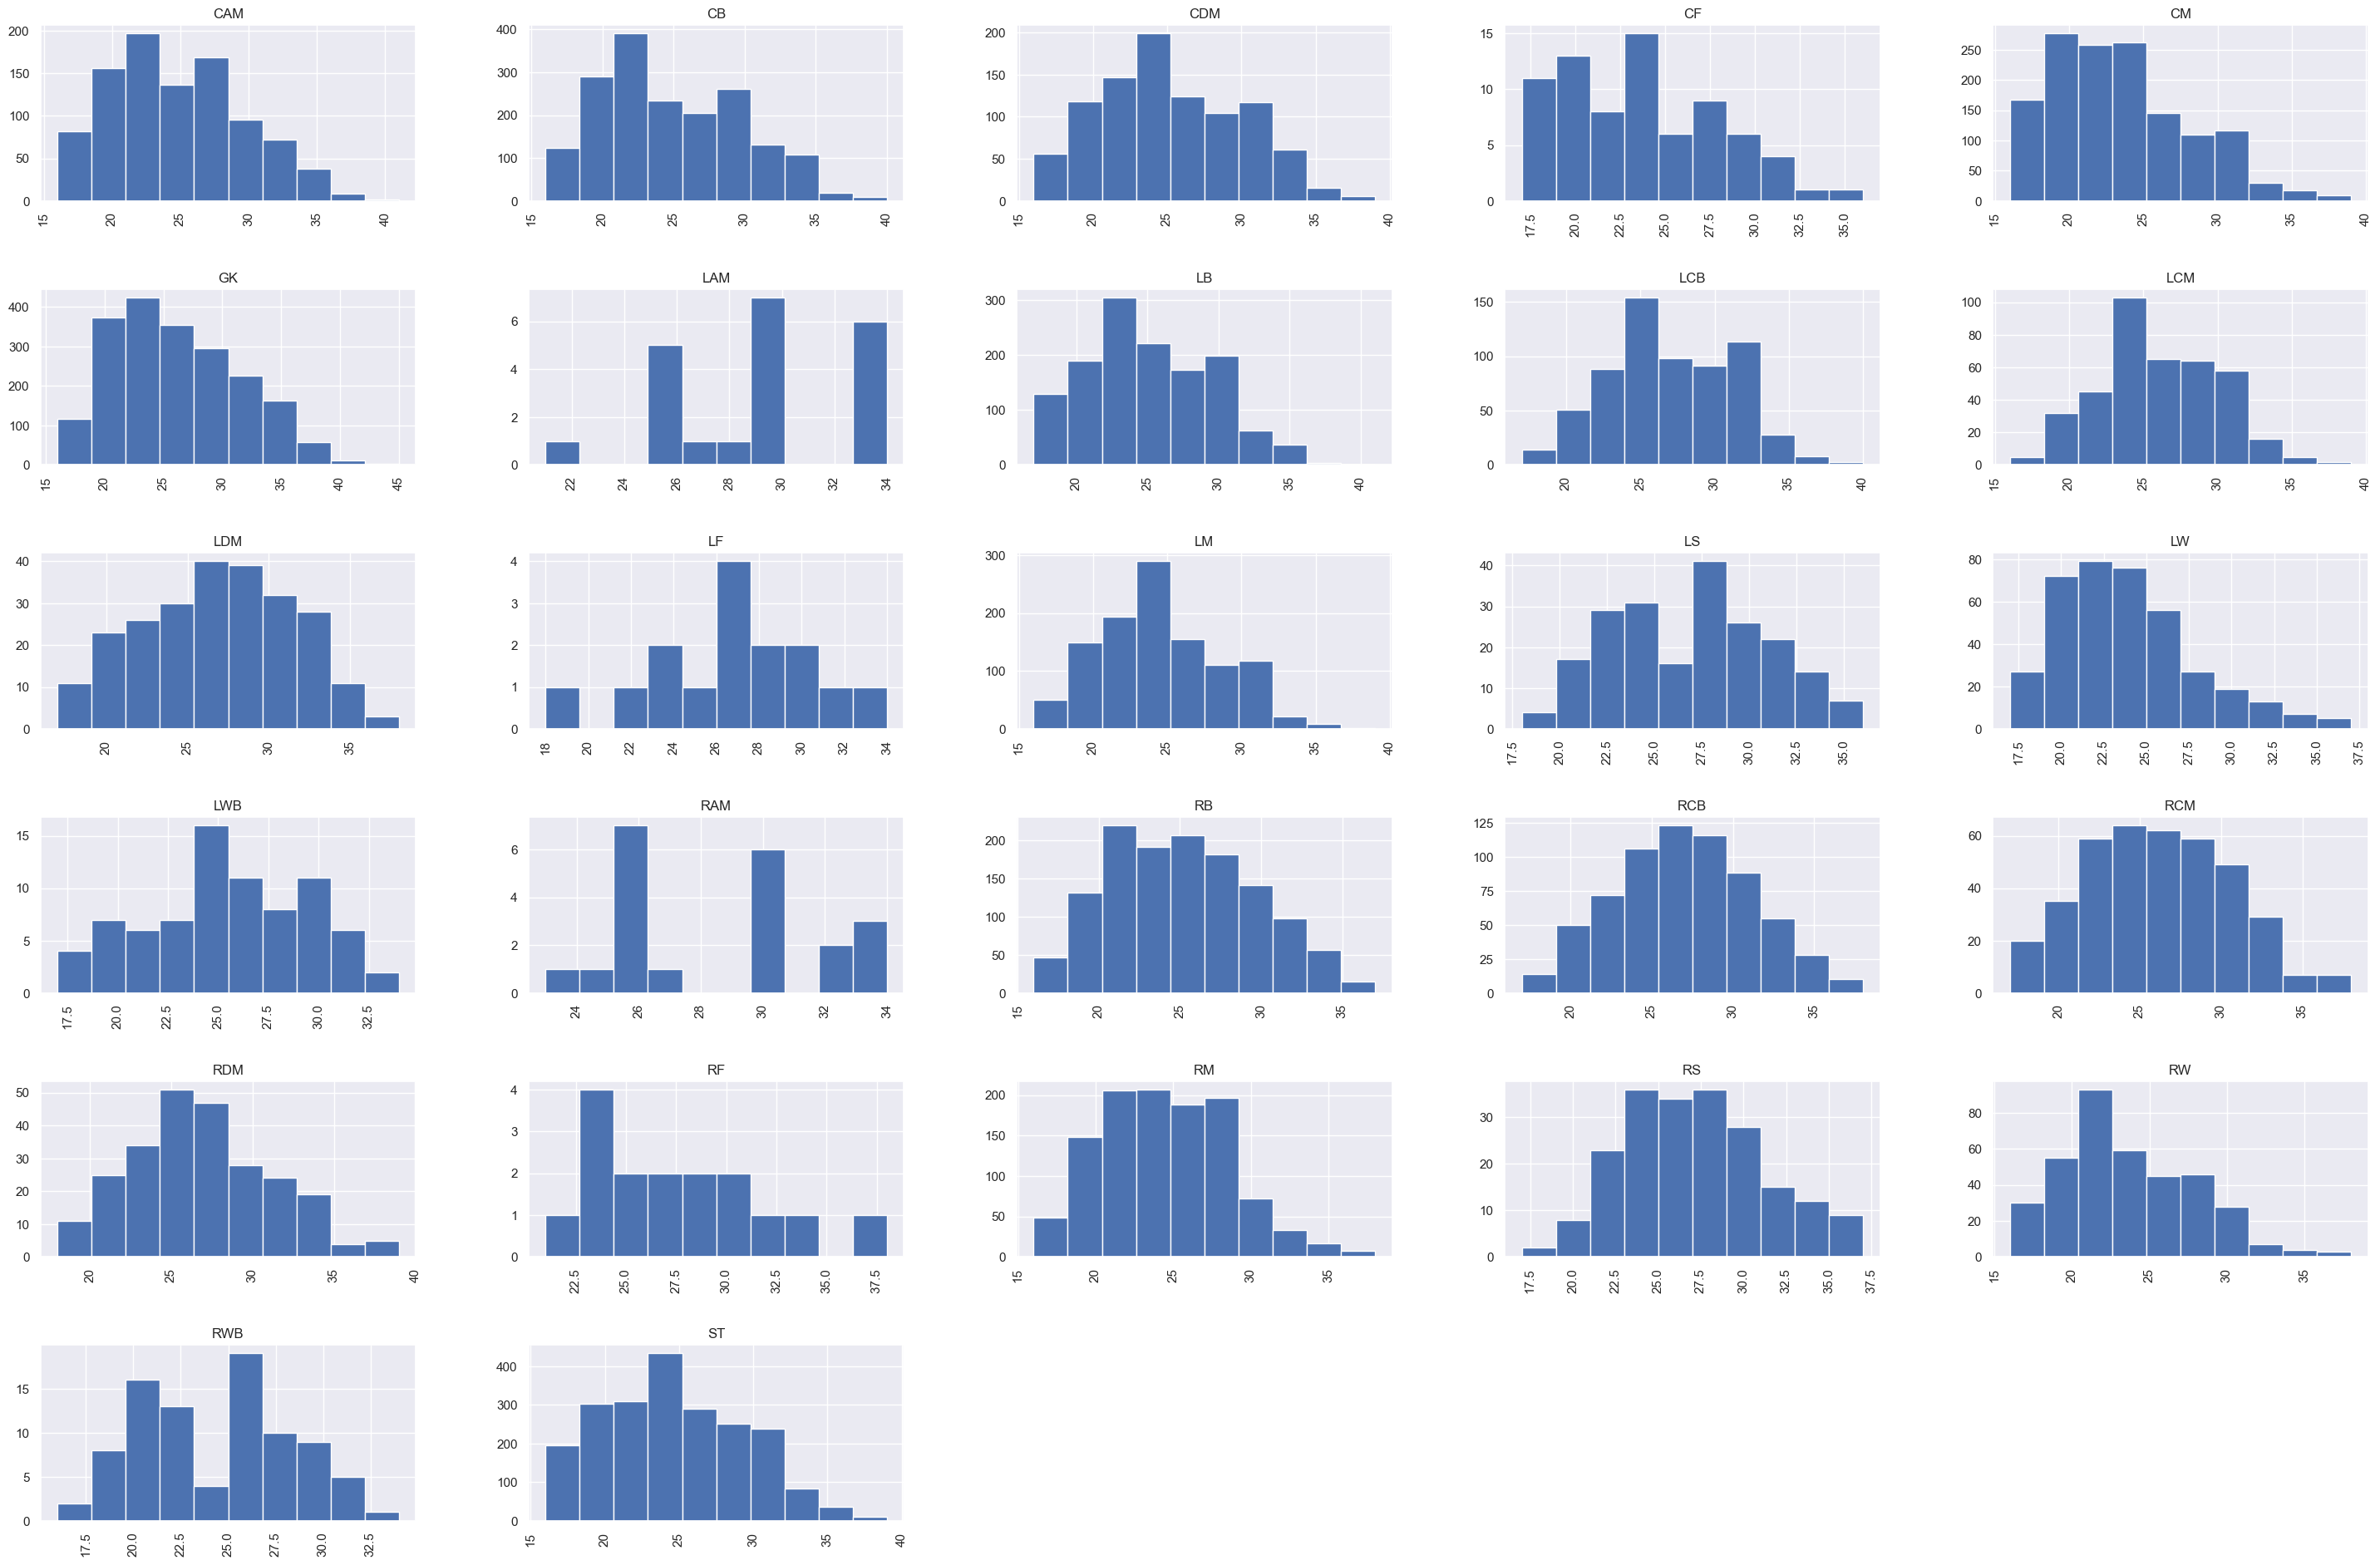

In [22]:
age_pos_df = pd.DataFrame({ 'Age': df['Age'].dropna(), 'Position': df['Position'] })
fig, ax = plt.subplots(figsize = (35,24))
age_pos_df.hist(column='Age', by='Position', ax=ax)
plt.show()

Распределение возрастов примерно идентичное. На одинаковых позициях могут играть как опытные игроки, так и совсем еще молодые.

14. Есть ли зависимость **скорости** (SprintSpeed) от **веса** и **роста**? От **национальности**?

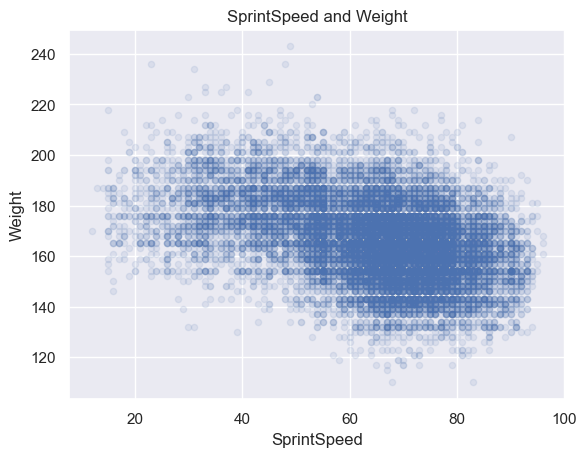

In [23]:
# сбда писатб
fig, ax = plt.subplots()
speed_weight_df = df[['SprintSpeed', 'Weight']]
speed_weight_na_df = speed_weight_df.dropna()

speed_weight_final_df = pd.DataFrame({'Weight': speed_weight_na_df['Weight'].apply(lambda x: int(str(x)[:-3])), 'SprintSpeed': speed_weight_na_df['SprintSpeed']})

speed_weight_final_df.plot(kind='scatter', x='SprintSpeed', y='Weight', color=['b'], ax=ax, alpha=0.1)
ax.set_title('SprintSpeed and Weight')
plt.show()

In [24]:
speed_weight_final_df.corr()

,Weight,SprintSpeed
Weight,1.000000,-0.410936
SprintSpeed,-0.410936,1.000000


Исходя из значения корреляции, скорость обратно зависит от веса, то есть при увеличении веса игрока, его скорость падает.

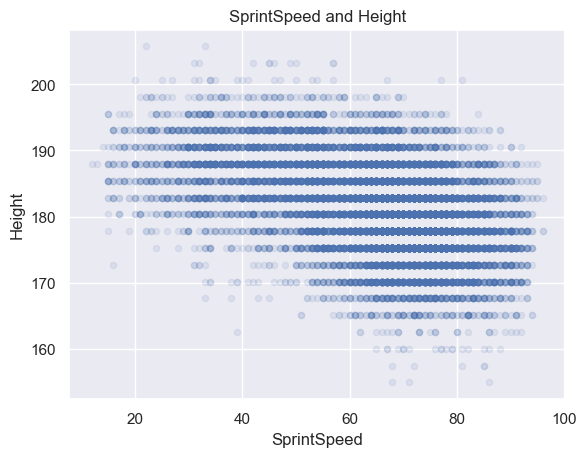

In [25]:
fig, ax = plt.subplots()
speed_height_df = df[['SprintSpeed', 'Height']]
speed_height_na_df = speed_height_df.dropna()

speed_height_final_df = pd.DataFrame({'Height': speed_height_na_df['Height'].apply(lambda x:parse_ht(x)), 'SprintSpeed': speed_height_na_df['SprintSpeed']})

speed_height_final_df.plot(kind='scatter', x='SprintSpeed', y='Height', color=['b'], ax=ax, alpha=0.1)
ax.set_title('SprintSpeed and Height')
plt.show()

In [26]:
speed_height_final_df.corr()

,Height,SprintSpeed
Height,1.0000,-0.4656
SprintSpeed,-0.4656,1.0000


Также исходя из значения корреляции, скорость обратно зависит от роста, то есть при увеличении роста игрока, его скорость падает.

14.649952914352935
Nationality
Afghanistan     8.164966
Albania        11.741825
Algeria        12.522646
Andorra              NaN
Angola          7.893940
                 ...    
Uzbekistan      4.242641
Venezuela      14.021504
Wales          14.129004
Zambia          8.396428
Zimbabwe        7.671960
Name: SprintSpeed, Length: 164, dtype: float64


<AxesSubplot:xlabel='Nationality'>

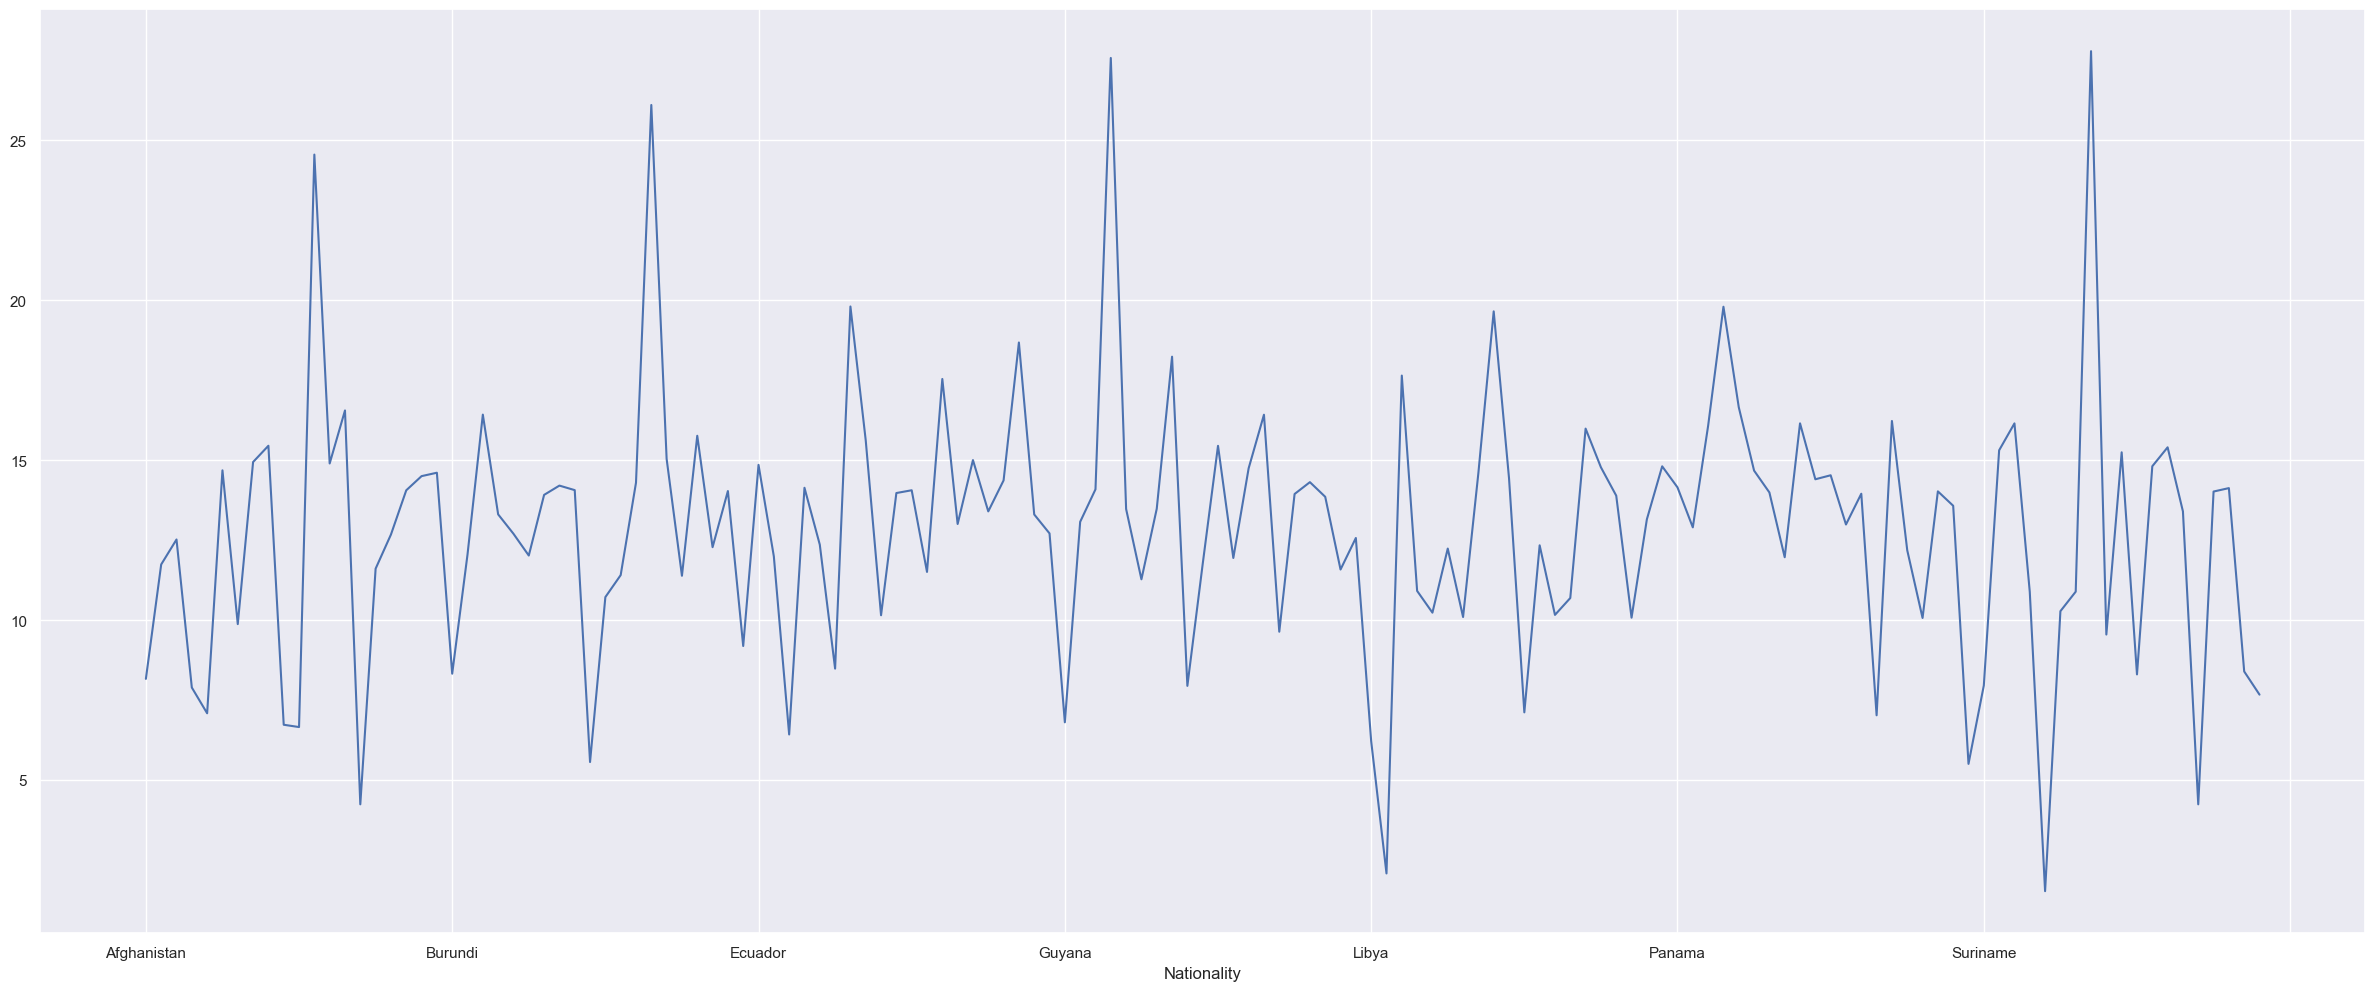

In [27]:
speed_nat_df = df[['SprintSpeed', 'Nationality']]
speed_nat_na_df = speed_nat_df.dropna()

print(speed_nat_na_df['SprintSpeed'].std())

speed_nat_na_final_df = speed_nat_na_df.groupby(['Nationality'])['SprintSpeed'].std()
print(speed_nat_na_final_df)


speed_nat_final_na_df = speed_nat_na_final_df.dropna()
speed_nat_final_na_df.plot(figsize=(30,12))

Среднеквадратичное отклонение по всем национальностям примерно 14, у некоторых национальностей оно выше, у других ниже. Это означает, что чем выше отклонение, тем зависимость меньше.

15. Под какими номерами чаще всего играют нападающие? Визуализируйте частотность

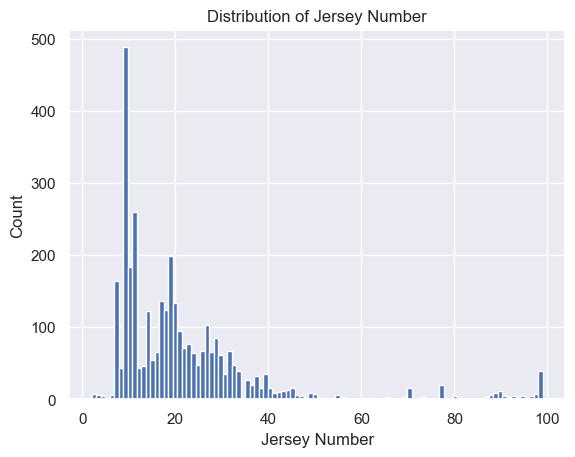

In [28]:
# давай-давай 
numbers = df[['Jersey Number', 'Position']]
striker_position = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
numbers = numbers[numbers['Position'].isin(striker_position)]
fig, ax = plt.subplots()
numbers.hist(column='Jersey Number', bins=100, ax=ax)
ax.set_title('Distribution of Jersey Number')
ax.set_xlabel('Jersey Number')
ax.set_ylabel('Count')
plt.show()

Чаще всего нападающие играют под номерами '9', '11', '19', '10

16. Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)? 


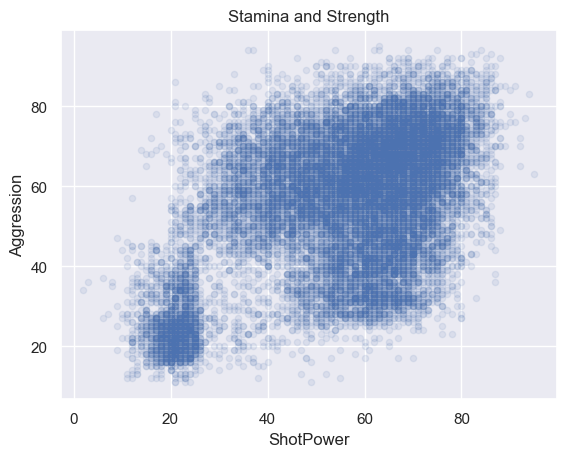

In [29]:
# давай-давай, нападай
fig, ax = plt.subplots()
shot_aggression_df = df[['ShotPower', 'Aggression']]
shot_aggression_df.plot(kind='scatter', x='ShotPower', y='Aggression', rot=0, color=['b'], ax=ax, alpha=0.1)
ax.set_title('Stamina and Strength')
plt.show()

In [30]:
shot_aggression_df.corr(method='pearson')

,ShotPower,Aggression
ShotPower,1.000000,0.491386
Aggression,0.491386,1.000000


Корреляция средняя, что означает, что линейная зависимость существует.

In [31]:
shot_foot_df = df[['Preferred Foot', 'ShotPower']]
shot_foot_final_df = pd.get_dummies(shot_foot_df, drop_first=True)
shot_foot_final_df.corr()

,ShotPower,Preferred Foot_Right
ShotPower,1.000000,-0.074045
Preferred Foot_Right,-0.074045,1.000000


Исходя из значений корреляции, зависимости между ведущей ногой и силой удара нет, либо она очень слабая.

17. Найдите суммарную стоимость игроков в каждом клубе
18. Визуализируйте соотношение сумарной стоимости топ 10 клубов

In [32]:
# удачи... 
def value_to_float_thousand(value):
    if value[-1] == 'M':
        value = float(value[1:-1])*1000
    elif value[-1] == 'K':
        value = float(value[1:-1])*1
    else:
      value = float(value[1:])
    return value

value_club_df = pd.DataFrame({'Value': df['Value'].apply(value_to_float_thousand), 'Club': df['Club']})
value_int_club_df = value_club_df.groupby(['Club'])['Value'].sum()
value_int_club_df.head(10)

Club
 SSV Jahn Regensburg      23095.0
1. FC Heidenheim 1846     27490.0
1. FC Kaiserslautern      16195.0
1. FC Köln               135910.0
1. FC Magdeburg           20525.0
1. FC Nürnberg            77640.0
1. FC Union Berlin        49485.0
1. FSV Mainz 05          138355.0
AC Ajaccio                18530.0
AC Horsens                 8420.0
Name: Value, dtype: float64

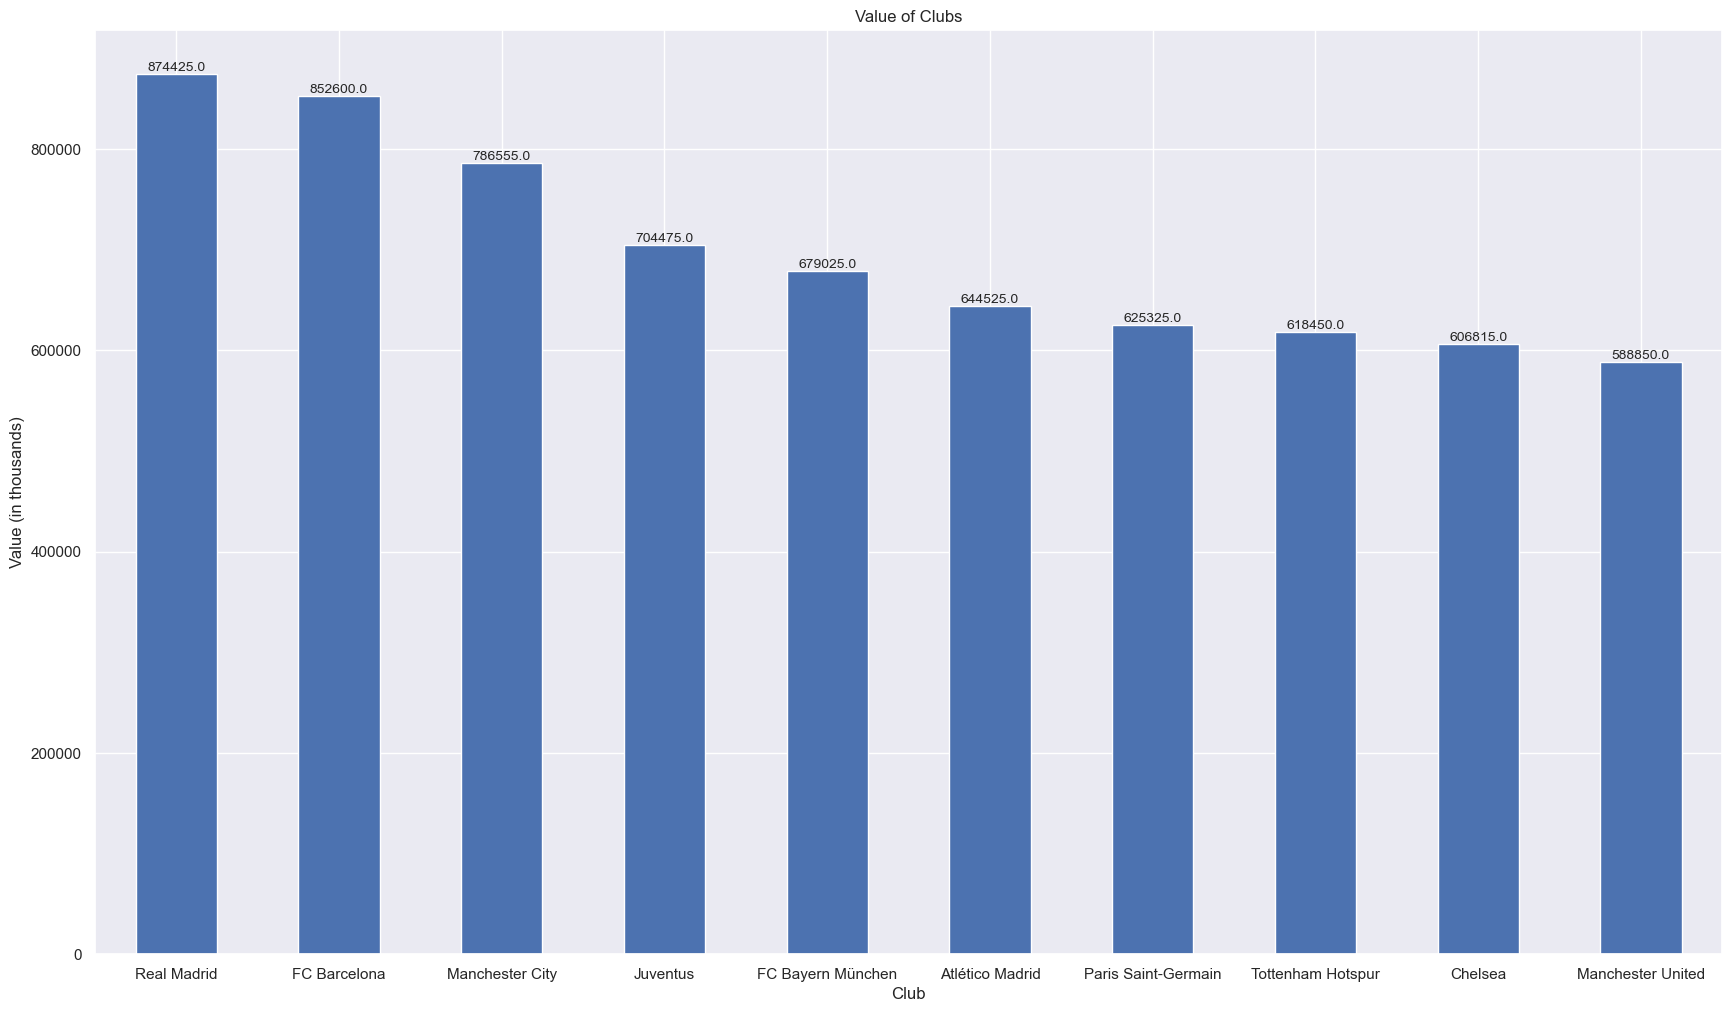

In [33]:
fig, ax = plt.subplots(figsize=(21, 12))
value_int_club_df.nlargest(10).plot(kind='bar', rot=0, ax=ax, color=['b'], alpha=1)

x = range(10)
y = value_int_club_df.nlargest(10).values
percentage = value_int_club_df.nlargest(10).values

for x, y, p in zip(x, y, percentage):
   plt.text(x, y, p, ha = 'center', va = 'bottom', fontsize = 10)

ax.set_title('Value of Clubs')
ax.set_ylabel('Value (in thousands)')
ax.set_xlabel('Club')
plt.show()

19. Есть ли зависимость между продолжительностью контракта игрока и его стоимостью? 

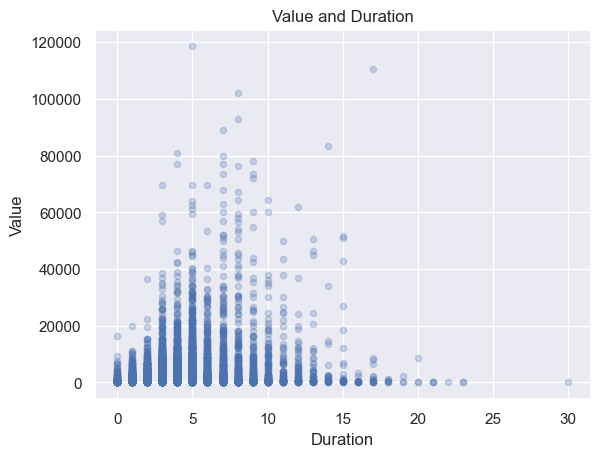

In [34]:
# ...
mean_valid_until = df['Contract Valid Until'].dropna().apply(lambda x: int(x[-4:])).mean()
mean_joined = df['Joined'].dropna().apply(lambda x: int(x[-4:])).mean()


value_duration_df = pd.DataFrame({ 'Duration': df['Contract Valid Until'].fillna(str(round(mean_valid_until))).apply(lambda x: int(x[-4:])) - df['Joined'].fillna(str(round(mean_joined))).apply(lambda x: int(x[-4:])), 'Value': df['Value'].apply(value_to_float_thousand)})

fig, ax = plt.subplots()
value_duration_df.plot(kind='scatter', x='Duration', y='Value', rot=0, color=['b'], ax=ax, alpha=0.25)
ax.set_title('Value and Duration')
ax.set_ylabel('Value')
ax.set_xlabel('Duration')
plt.show()

In [35]:
value_duration_df.corr()

,Duration,Value
Duration,1.000000,0.225933
Value,0.225933,1.000000


Вполне возможно, что есть слабая зависимость, однако, смотря на график, не видно зависимости между продолжительностью контракта и его стоимостью.

20. В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? Визуализируйте зависимость

In [36]:
# ...
print(df['Club'].isna().sum())

241


21. Есть ли зависмость **потенциала** (Potential) игрока от **возраста**?
22. Всегда ли молодые игроки обладают большим потенциалом?

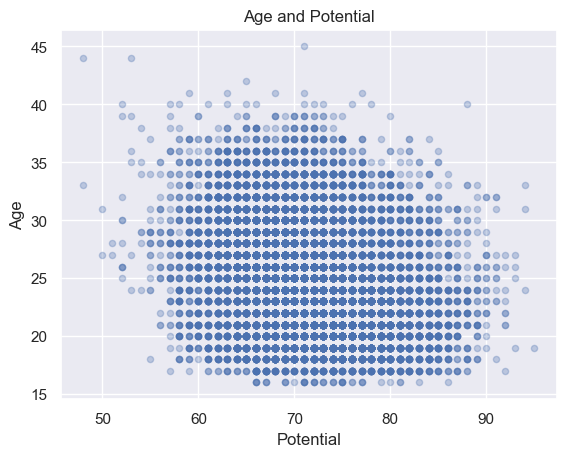

In [37]:
# ...
fig, ax = plt.subplots()
pot_age_df = df[['Potential', 'Age']]
pot_age_df.plot(kind='scatter', x='Potential', y='Age', color=['b'], ax=ax, alpha=0.3)
ax.set_title('Age and Potential')
plt.show()

In [38]:
pot_age_df.corr()

,Potential,Age
Potential,1.000000,-0.253312
Age,-0.253312,1.000000


Есть слабая обратная зависимость между потенциалом и возрастом.

Далеко не всегда, однако зачастую молодые игроки обладают большим потенциалом.

23. Есть ли зависимость **рейтинга** игрока (Overall) от **возраста**?
24. Когда у игроков "пик" карьеры?
25. Игроков какого возраста больше всего с рейтингом 90+?

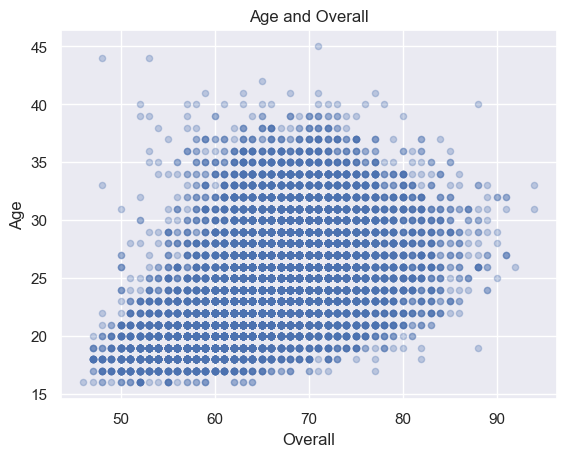

In [39]:
# ...
fig, ax = plt.subplots()
overall_age_df = df[['Overall', 'Age']]
overall_age_df.plot(kind='scatter', x='Overall', y='Age', color=['b'], ax=ax, alpha=0.3)
ax.set_title('Age and Overall')
plt.show()

In [40]:
overall_age_df.corr()

,Overall,Age
Overall,1.00000,0.45235
Age,0.45235,1.00000


Существует зависимость между рейтингом и возрастом.

In [41]:
max_overall_90 = df[df['Overall'] >= 90]['Age']
max_overall_90.value_counts()

32    4
27    3
31    2
33    1
26    1
25    1
29    1
28    1
Name: Age, dtype: int64

Больше всего игроков с рейтингом 90 возрастом 32 года.

In [42]:
overall_age_group_df = overall_age_df.groupby(['Age'])['Overall'].mean()
overall_age_group_df

Age
16    54.452381
17    56.404844
18    57.741803
19    59.583008
20    61.858871
21    63.480675
22    64.994030
23    66.244745
24    67.306333
25    67.973465
26    68.514780
27    68.949225
28    69.213442
29    69.246090
30    69.695747
31    69.850071
32    69.529617
33    69.558824
34    69.539604
35    68.132653
36    67.937008
37    68.939024
38    67.378378
39    67.640000
40    67.692308
41    67.600000
42    65.000000
44    50.500000
45    71.000000
Name: Overall, dtype: float64

Исходя из вышепредставленных данных можно предположить, что "пик" карьеры игрока - это примерно возраст в промежутке 28-34.

26. Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость

241468.97280169


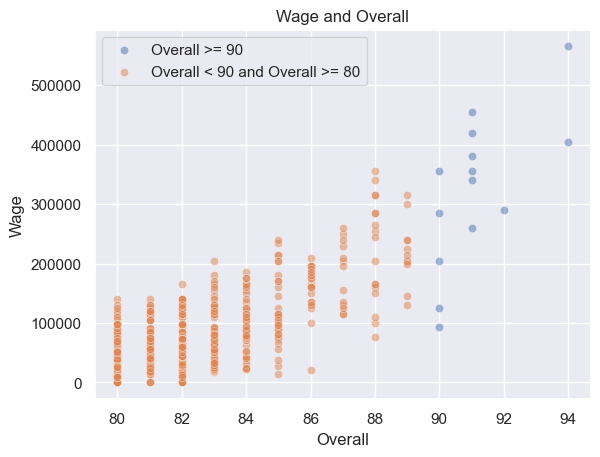

In [43]:
# ...
wage_90_df = pd.DataFrame({ 'Wage': df[(df['Overall'] >= 90)]['Wage'].apply(lambda x: value_to_float(x)), 'Overall': df[df['Overall'] >= 90]['Overall']})

wage_80_90_df = pd.DataFrame({ 'Wage': df[(df['Overall'] < 90) & (df['Overall'] >= 80)]['Wage'].apply(lambda x: value_to_float(x)), 'Overall': df[(df['Overall'] < 90) & (df['Overall'] >= 80)]['Overall']})

print(wage_90_df['Wage'].mean() - wage_80_90_df['Wage'].mean())

fig, ax = plt.subplots()
ax.set_title('Wage and Overall')

sns.scatterplot(data=wage_90_df, x="Overall", y="Wage", legend=True, alpha=0.5)
sns.scatterplot(data=wage_80_90_df, x="Overall", y="Wage", legend=True, alpha=0.5)
ax.legend(['Overall >= 90', 'Overall < 90 and Overall >= 80'])
plt.show()

Примерно на 241468 различается средняя зарплата игроков с рейтингом 90+ и средняя зарплата игроков с рейтингом 80-90.